In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [22]:
genes = ['gene ' + str(i) for i in range(1,101)]

wt = ['wt ' + str(i) for i in range(1,6)]

ko = ['ko ' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns = [*wt, *ko], index = genes)

for gene in data.index:
    data.loc[gene,'wt 1':'wt 5'] = np.random.poisson(lam = np.random.randint(10,1000), size = 5)
    data.loc[gene,'ko 1':'ko 5'] = np.random.poisson(lam = np.random.randint(10,1000), size = 5)

In [23]:
data

,wt 1,wt 2,wt 3,wt 4,wt 5,ko 1,ko 2,ko 3,ko 4,ko 5
gene 1,501,426,457,405,461,910,904,987,971,973
gene 2,140,127,135,132,146,797,804,857,777,767
gene 3,929,813,855,863,869,202,234,218,205,202
gene 4,83,87,92,73,99,460,459,455,426,442
gene 5,758,854,830,800,796,832,790,812,836,811
...,...,...,...,...,...,...,...,...,...,...
gene 96,236,236,237,247,210,55,56,58,70,69
gene 97,47,49,34,57,45,956,1031,962,950,943
gene 98,535,518,540,562,517,61,65,62,61,69
gene 99,976,1002,1026,938,1038,456,478,480,484,452


In [47]:
print([i for i in dir(pca) if '__' not in i])

['_abc_impl', '_fit', '_fit_full', '_fit_svd_solver', '_fit_truncated', '_get_param_names', '_get_tags', 'components_', 'copy', 'explained_variance_', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_covariance', 'get_params', 'get_precision', 'inverse_transform', 'iterated_power', 'mean_', 'n_components', 'n_components_', 'n_features_', 'n_samples_', 'noise_variance_', 'random_state', 'score', 'score_samples', 'set_params', 'singular_values_', 'svd_solver', 'tol', 'transform', 'whiten']


In [25]:
scaled_data = preprocessing.scale(data.T) # As the samples are in columns, and the features are in rows(genes)
# scaled_data = StandardScaler().fit_transform(data.T) . This does the same

In [32]:
scaled_data

array([[-0.78839115, -0.98568177,  1.18911945, -1.01912702, -2.05717699,
        -0.95203389, -1.0129937 ,  0.95081506, -1.05175002,  0.95478917,
        -1.29474782, -0.97158367, -1.01902158,  0.81739614,  2.04000258,
         0.28747754, -0.36530106,  0.98484561, -0.76418694,  1.09840762,
         1.0737992 , -0.84076944, -0.6806965 ,  0.97228753, -1.01192602,
        -0.9857062 ,  0.99374155, -0.98596742,  0.98270102,  0.93235278,
        -0.60228347,  0.92161133, -1.02914845,  1.01305707, -0.99147315,
        -0.9332557 , -1.03631135, -1.13178577,  0.9271448 , -1.06373883,
         0.95086321, -0.74729816, -1.00396611, -0.98614867,  1.21730934,
         0.81612585,  1.06913808,  0.99601201,  1.21953519,  0.49402026,
         0.8457223 ,  1.04914728, -0.99718963,  1.18784515,  1.03861179,
         1.12718146,  0.72768483,  1.13068398,  0.9050053 ,  1.04665103,
        -1.02407992,  1.00639762, -1.0294855 ,  0.77627432,  0.92731222,
         0.91447869, -0.91579487, -0.91204378, -1.0

In [63]:
pca = PCA()

pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
print(pca_data.shape)
pca_data

(10, 10)


array([[-9.56192404e+00, -1.25204519e+00, -1.78803327e+00,
        -3.35565515e-01, -1.51935292e+00, -1.02516140e-01,
        -6.92995110e-01, -6.26860072e-01, -4.67246939e-01,
         3.77475828e-15],
       [-9.62103545e+00,  1.29219819e+00,  1.25930448e+00,
         2.34720127e+00, -4.04637779e-01, -5.92433109e-01,
         2.70450689e-01, -4.17031514e-01,  5.35535902e-01,
         5.55111512e-16],
       [-9.57899356e+00,  1.51642287e+00, -8.52212658e-02,
         1.13492738e-01,  1.62675263e+00, -1.77622304e-01,
        -7.00564490e-01,  3.67678738e-01, -8.30854287e-01,
        -4.99600361e-16],
       [-9.37912972e+00, -1.16515852e+00, -5.91346270e-02,
         1.54346533e-01, -3.56176992e-02,  1.62148059e+00,
         1.10932893e+00,  5.13387658e-01, -1.65360960e-01,
         8.88178420e-16],
       [-9.69684608e+00, -4.65545745e-01,  6.63317189e-01,
        -2.26202376e+00,  3.77715047e-01, -7.18603556e-01,
         2.92668975e-02,  1.28860865e-01,  9.20000690e-01,
         2.

In [57]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals = 1)
labels = [f"PC {str(x)}" for x in range(1, len(per_var)+1)]
print(per_var)
print(labels)

[91.6  2.4  2.1  1.3  0.8  0.7  0.4  0.3  0.3  0. ]
['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']


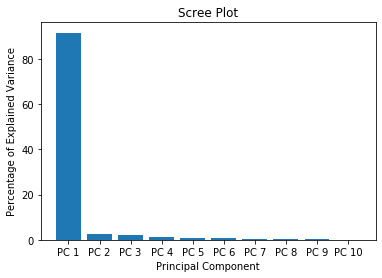

In [62]:
plt.bar(labels, per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [68]:
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)
pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
wt 1,-9.561924,-1.252045,-1.788033,-0.335566,-1.519353,-0.102516,-0.692995,-0.626860,-0.467247,3.774758e-15
wt 2,-9.621035,1.292198,1.259304,2.347201,-0.404638,-0.592433,0.270451,-0.417032,0.535536,5.551115e-16
wt 3,-9.578994,1.516423,-0.085221,0.113493,1.626753,-0.177622,-0.700564,0.367679,-0.830854,-4.996004e-16
wt 4,-9.379130,-1.165159,-0.059135,0.154347,-0.035618,1.621481,1.109329,0.513388,-0.165361,8.881784e-16
wt 5,-9.696846,-0.465546,0.663317,-2.262024,0.377715,-0.718604,0.029267,0.128861,0.920001,2.442491e-15
ko 1,9.640390,-0.184215,3.336753,-0.791482,-0.370358,0.203350,0.011162,-0.518848,-0.614487,2.220446e-16
ko 2,9.854675,-1.865117,-1.386355,0.439490,1.005903,-1.151657,0.865349,-0.377550,-0.230150,-2.220446e-15
ko 3,9.249865,-1.201135,0.320505,0.788753,-0.735082,-0.430501,-0.641091,1.315670,0.150430,-2.442491e-15
ko 4,9.284620,3.434589,-1.504157,-0.825822,-0.784562,-0.005079,0.555716,0.167242,-0.018624,1.776357e-15
ko 5,9.808378,-0.109993,-0.756978,0.371610,0.839239,1.353582,-0.806624,-0.552550,0.720757,-3.108624e-15


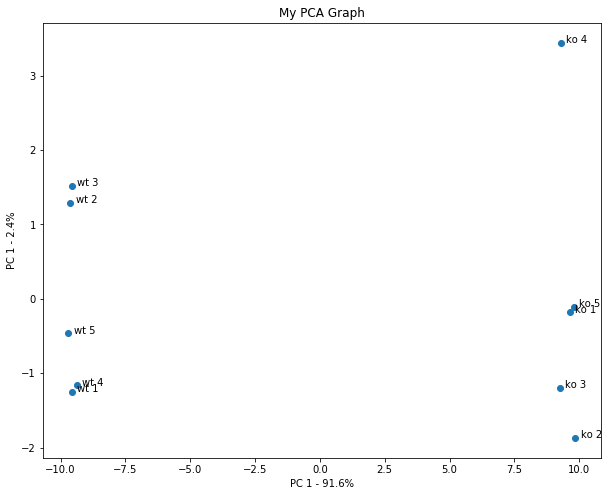

In [82]:
plt.figure(figsize = (10,8))
plt.scatter(pca_df['PC 1'], pca_df['PC 2'])
plt.title('My PCA Graph')
plt.xlabel(f"PC 1 - {per_var[0]}%")
plt.ylabel(f"PC 1 - {per_var[1]}%")

for sample in pca_df.index:
    plt.annotate(sample, (pca_df['PC 1'].loc[sample] +0.2 ,pca_df['PC 2'].loc[sample]))
    
plt.show()